# Imports

In [1]:
from sklearn.datasets import load_iris, load_wine
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

In [2]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

In [9]:
px.scatter(X, x=X.columns[0], y=X.columns[1], color=wine.target)

In [8]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


# Scaling

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Hierarchical Clustering

### Dendrofgram

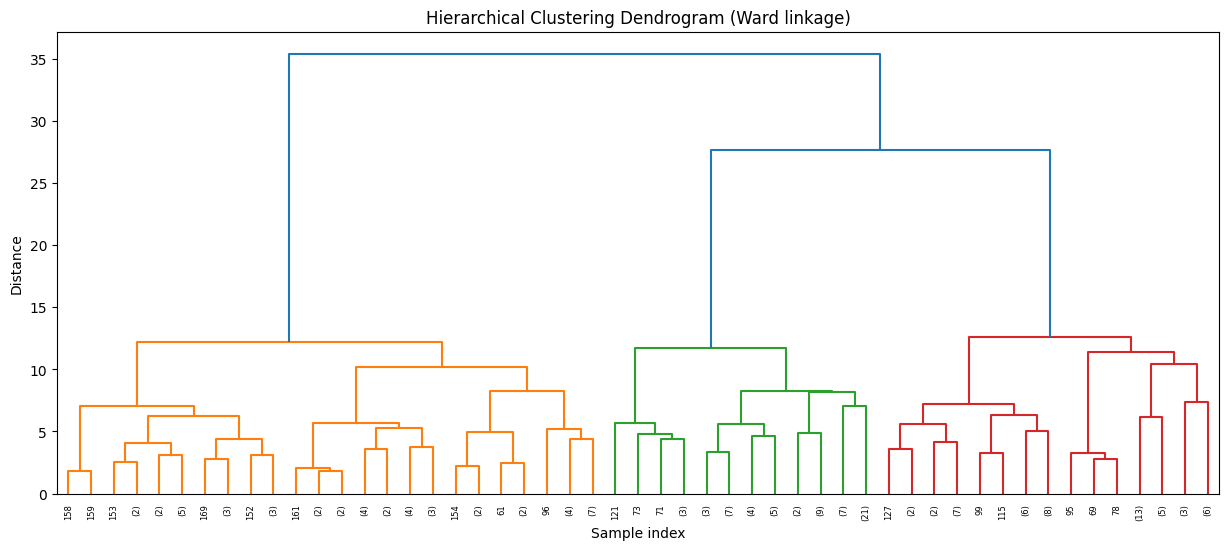

In [7]:
plt.figure(figsize=(15, 6))
Z = linkage(X_scaled, method='ward')  # try 'complete', 'average', 'single'
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Ward linkage)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


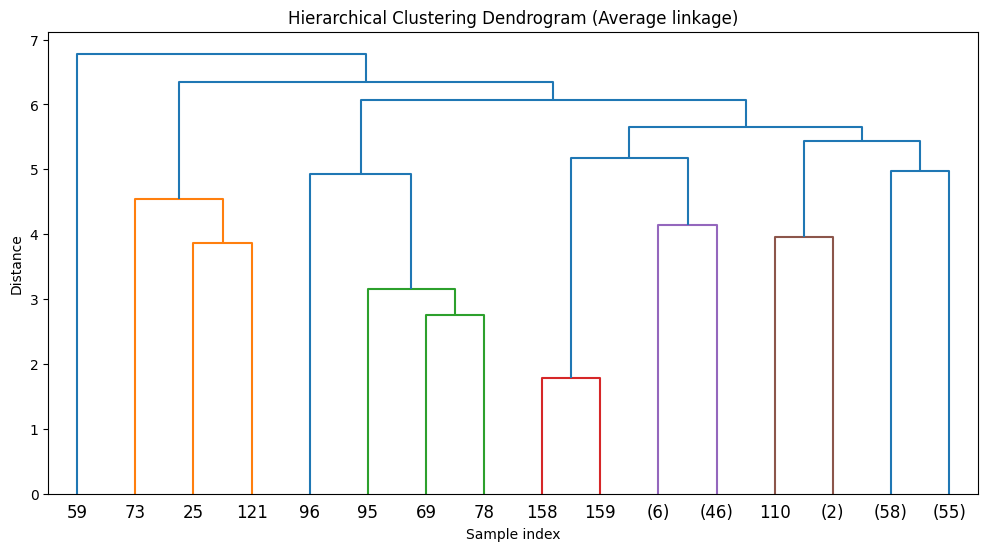

In [12]:
plt.figure(figsize=(12, 6))
Z = linkage(X_scaled, method='average')  # try 'complete', 'average', 'single'
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Average linkage)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

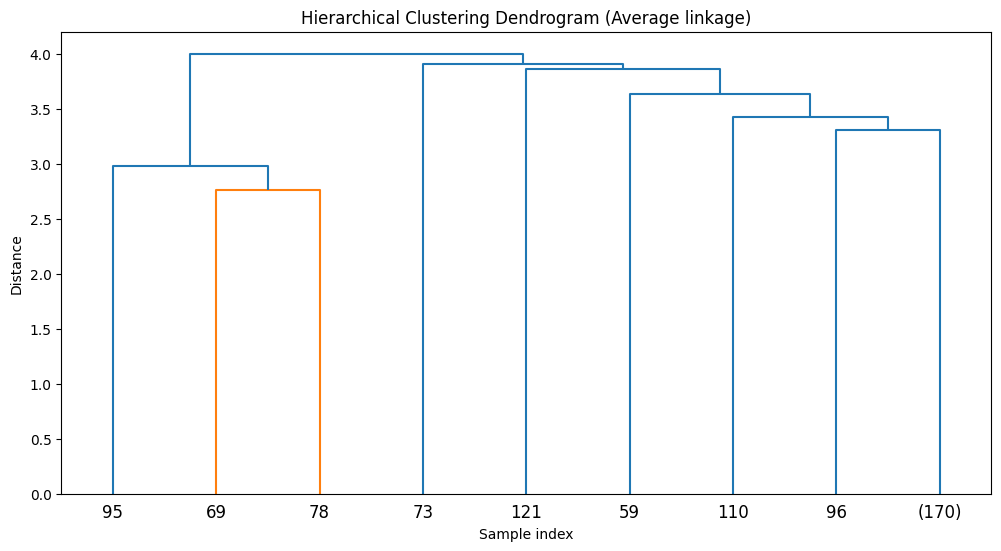

In [11]:
plt.figure(figsize=(12, 6))
Z = linkage(X_scaled, method='single')  # try 'complete', 'average', 'single'
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Average linkage)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

### Agglomerative clustering

In [13]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 3
cluster_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = cluster_model.fit_predict(X_scaled)

In [14]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

### Internal metrics

In [15]:
# Measures how similar a point is to its own cluster (cohesion) vs. other clusters (separation).
score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.2774439826952266


In [16]:
# Measures average similarity between each cluster and its most similar one (lower is better).
score = davies_bouldin_score(X_scaled, labels)
print("Davies-Bouldin Score:", score)

Davies-Bouldin Score: 1.4185919431857326


In [17]:
# Ratio of between-cluster dispersion to within-cluster dispersion (higher is better).
score = calinski_harabasz_score(X_scaled, labels)
print("Calinski-Harabasz Score:", score)

Calinski-Harabasz Score: 67.6474675044098


### Try various linkage methods

In [18]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 3
cluster_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
labels = cluster_model.fit_predict(X_scaled)

In [19]:
# Measures how similar a point is to its own cluster (cohesion) vs. other clusters (separation).
score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.15752526243774145


In [20]:
# Measures average similarity between each cluster and its most similar one (lower is better).
score = davies_bouldin_score(X_scaled, labels)
print("Davies-Bouldin Score:", score)

Davies-Bouldin Score: 1.029890223800151


In [21]:
# Ratio of between-cluster dispersion to within-cluster dispersion (higher is better).
score = calinski_harabasz_score(X_scaled, labels)
print("Calinski-Harabasz Score:", score)

Calinski-Harabasz Score: 4.031439116485448
